In [13]:
# Import python packages + Global definitions
import kineticstoolkit.lab as ktk
import matplotlib as mpl
import pandas as pd
import numpy as np
import scipy.spatial.distance as spsd

import matplotlib.pyplot as plt

%matplotlib inline
# Read point of interest + metadata csv's 

# Get the DriveLine Research OpenBiomechanics repository
import os
os.chdir('C:/Users/jaspe/Documents/GitHub/openbiomechanics/baseball_hitting')


FILEPATH_POI = 'data/poi/poi_metrics.csv'

FILEPATH_METADATA = 'data/metadata.csv'

poi_data = pd.read_csv(FILEPATH_POI)
metadata = pd.read_csv(FILEPATH_METADATA)

joint_data = joint_data = poi_data.merge(metadata)
joint_data = joint_data.loc[:, ['user','session_swing','session','exit_velo_mph_x','bat_speed_mph_contact_x','bat_speed_mph_max_x','bat_speed_xy_max_x','hitter_side','bat_length_in', 'session_mass_lbs', 'session_height_in']]
joint_data['session'].count(), len(joint_data['session'].value_counts()), joint_data['session'].value_counts().mean()


(677, 98, 6.908163265306122)

In [14]:
metadata.loc[:, ['highest_playing_level', 'user']].drop_duplicates()['highest_playing_level'].value_counts()


highest_playing_level
college        74
high_school    12
milb            8
independent     4
Name: count, dtype: int64

In [15]:
metadata.shape


(677, 13)

In [16]:
metadata.keys()


Index(['session_swing', 'session_mass_lbs', 'session_height_in', 'athlete_age',
       'highest_playing_level', 'hitter_side', 'bat_weight_oz',
       'bat_length_in', 'bat_speed_mph_max_x', 'blast_bat_speed_mph_x',
       'exit_velo_mph_x', 'user', 'session'],
      dtype='object')

In [17]:
joint_data.head(5)


,user,session_swing,session,exit_velo_mph_x,bat_speed_mph_contact_x,bat_speed_mph_max_x,bat_speed_xy_max_x,hitter_side,bat_length_in,session_mass_lbs,session_height_in
0,4,103_1,103,97.2,67.9426,69.2154,2529.2776,R,34.0,236.0,75.0
1,4,103_2,103,88.8,66.0435,66.0435,2446.7554,R,34.0,236.0,75.0
2,4,103_3,103,88.9,64.4315,65.0387,2414.5054,R,34.0,236.0,75.0
3,4,103_4,103,83.1,60.6261,60.9263,2368.4109,R,34.0,236.0,75.0
4,4,103_5,103,91.6,65.2323,66.0698,2463.9858,R,34.0,236.0,75.0


In [18]:
joint_data.tail(5)


,user,session_swing,session,exit_velo_mph_x,bat_speed_mph_contact_x,bat_speed_mph_max_x,bat_speed_xy_max_x,hitter_side,bat_length_in,session_mass_lbs,session_height_in
672,179,89_1,89,95.1,72.1051,74.0327,2596.8379,R,34.0,207.0,74.0
673,179,89_2,89,97.5,72.2512,73.3095,2538.6472,R,34.0,207.0,74.0
674,179,89_3,89,96.1,72.5907,72.5907,2461.4124,R,34.0,207.0,74.0
675,179,89_4,89,94.0,72.4539,73.3997,2591.0740,R,34.0,207.0,74.0
676,179,89_5,89,93.7,70.7024,72.8765,2536.9194,R,34.0,207.0,74.0


In [19]:
joint_data.sample(5)


,user,session_swing,session,exit_velo_mph_x,bat_speed_mph_contact_x,bat_speed_mph_max_x,bat_speed_xy_max_x,hitter_side,bat_length_in,session_mass_lbs,session_height_in
518,209,450_1,450,94.1,65.0425,66.6926,2545.9182,R,33.0,177.0,72.0
85,64,178_3,178,72.8,62.0861,62.9897,2352.4980,R,33.0,175.0,71.0
531,70,451_6,451,93.4,68.3311,69.0179,2553.0376,R,33.0,184.0,68.0
535,108,468_2,468,92.3,64.8146,64.9620,2588.4287,R,33.0,190.0,69.0
362,200,342_3,342,96.6,71.1742,72.3962,2811.2124,L,33.0,211.0,73.0


In [20]:
# C3D Sample Inspection
#### Read sample

FILEPATH_C3D = 'data/c3d/'
path_sample1 = '000004/000004_000103_75_236_R_003_972.c3d'
path_sample2 = '000243/000243_000448_72_185_R_002_852.c3d'
path_sample3 = '000192/000192_000492_69_166_R_011_911.c3d'
path_sample4 = '000120/000120_000244_70_174_R_017_891.c3d'
path_sample5 = '000068/000068_000181_69_152_R_011_885.c3d'
model = '/000004/000004_000103_model.c3d'

full_sample1_path = FILEPATH_C3D + path_sample1


In [21]:
sample = ktk.read_c3d(full_sample1_path)
sample1 = joint_data.loc[(joint_data['user'] == 4) &  (joint_data['session'] == 103) & (joint_data['exit_velo_mph_x'] == 97.2)]
sample2 = joint_data.loc[(joint_data['user'] == 243) &  (joint_data['session'] == 448) & (joint_data['exit_velo_mph_x'] == 85.2)]
sample3 = joint_data.loc[(joint_data['user'] == 192) &  (joint_data['session'] == 492) & (joint_data['exit_velo_mph_x'] == 91.2)]
sample4 = joint_data.loc[(joint_data['user'] == 120) &  (joint_data['session'] == 244) & (joint_data['exit_velo_mph_x'] == 89.1)]
sample5 = joint_data.loc[(joint_data['user'] == 68) &  (joint_data['session'] == 181) & (joint_data['exit_velo_mph_x'] == 88.5)]
sample_df = sample3
sample_df.head()
##### Dynamically load samples
# Incomplete naming scheme, missing SWINGNUMBER

path_sample1 = '{:06d}'.format(sample1['user'][0])+'/'+'{:06d}'.format(sample1['user'][0])+'_'+\
  '{:06d}'.format(sample1['session'][0])+'_'+'{:02d}'.format(int(sample1['session_height_in'][0]))+'_'+\
  '{:02d}'.format(int(sample1['session_mass_lbs'][0]))+'_'+sample1['hitter_side'][0]+'_'+\
  '{:03d}'.format(int(sample1['session_swing'][0].split('_')[1]))+'_'+str(sample1['exit_velo_mph_x'][0]).replace('.', '')+'.c3d'

# print('\''+FILEPATH_C3D+path_sample1+'\'') == '../../data/openbiomechanics/baseball_hitting/data/c3d/000004/000004_000103_75_236_R_003_972.c3d'


In [22]:

#### Inspect points

sample['Points'].data.keys()


dict_keys(['C7', 'CLAV', 'LANK', 'LASI', 'LBHD', 'LELB', 'LFHD', 'LFIN', 'LFRM', 'LHEE', 'LKNE', 'LMANK', 'LMELB', 'LMKNE', 'LPSI', 'LSHO', 'LTHI', 'LTIB', 'LTOE', 'LUPA', 'LWRA', 'LWRB', 'Marker1', 'Marker10', 'Marker2', 'Marker3', 'Marker4', 'Marker5', 'Marker6', 'Marker7', 'Marker8', 'Marker9', 'RANK', 'RASI', 'RBAK', 'RBHD', 'RELB', 'RFHD', 'RFIN', 'RFRM', 'RHEE', 'RKNE', 'RMANK', 'RMELB', 'RMKNE', 'RPSI', 'RSHO', 'RTHI', 'RTIB', 'RTOE', 'RUPA', 'RWRA', 'RWRB', 'STRN', 'T10'])

In [23]:
sample['Points'].data['T10']


array([[-0.76827437,  0.86600381,  1.33521903,  1.        ],
       [-0.76918614,  0.86597294,  1.3352828 ,  1.        ],
       [-0.77069694,  0.86588007,  1.33535075,  1.        ],
       ...,
       [-0.72513217,  0.47317865,  1.11525536,  1.        ],
       [-0.72601169,  0.47329754,  1.11529791,  1.        ],
       [-0.72720063,  0.47338423,  1.11539125,  1.        ]])

In [24]:
sample["Points"].data['Marker2']


array([[-0.88990581,  1.10835958,  1.81133616,  1.        ],
       [-0.89030832,  1.10751915,  1.81289589,  1.        ],
       [-0.89069551,  1.10615909,  1.8152796 ,  1.        ],
       ...,
       [-1.2268641 ,  0.2863268 ,  1.33951354,  1.        ],
       [-1.22575068,  0.28723723,  1.34246755,  1.        ],
       [-1.22449005,  0.28867352,  1.34735739,  1.        ]])

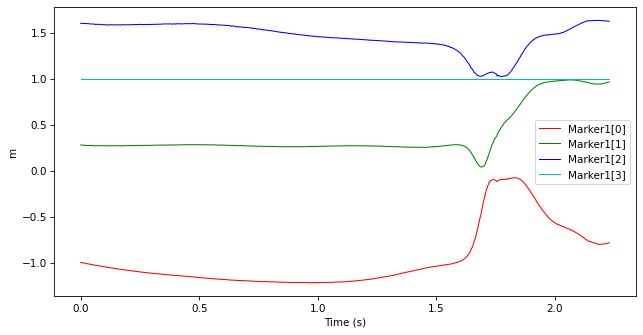

In [25]:

##### Plot Points

sample["Points"].plot(["Marker1"])


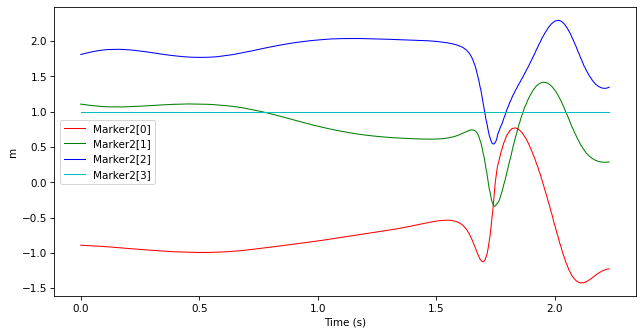

In [26]:
sample["Points"].plot(["Marker2"])


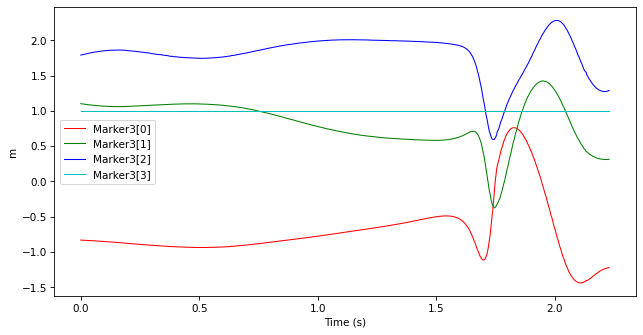

In [27]:
sample["Points"].plot(["Marker3"])


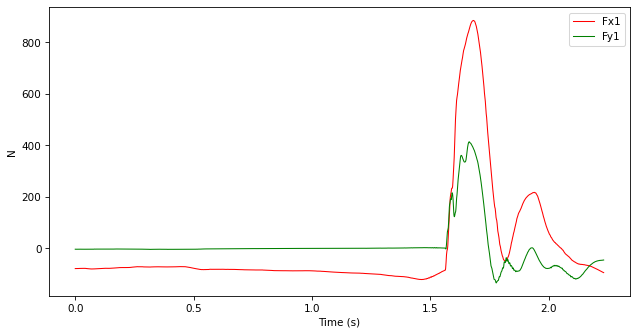

In [28]:
#### Inspect Analogs
sample["Analogs"].data
##### Plot Analogs
sample['Analogs'].plot(['Fx1', 'Fy1'])


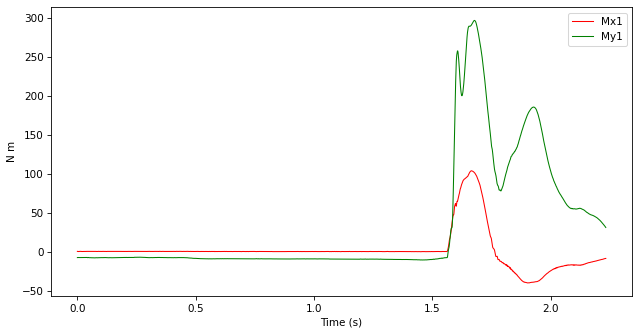

In [29]:
sample['Analogs'].plot(['Mx1', 'My1'])


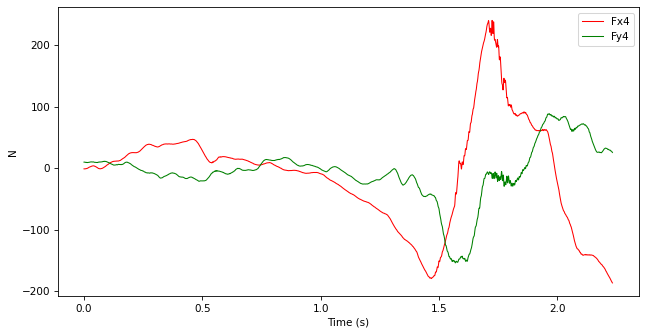

In [30]:
sample['Analogs'].plot(['Fx4', 'Fy4'])




In [39]:

# Interactive 3D Player
%matplotlib qt5

interconnections = dict()

interconnections['Bat'] = {
    "Color": (0, 0.5, 1),
    "Links": [ 
        ['Marker1','Marker2', 'Marker3', 'Marker1'],
    ],
}

# interconnections['Spine'] = {
#   "Color": (1, 0.5, 0.5), 
#   "Links": [
#         ['T10', 'C7'],
#   ],
# }


interconnections['LH'] = {
  "Color": (0, 0.5, 0.5), 
  "Links": [
        ['LWRA', 'LFIN','LWRB', 'LWRA'],
  ],
}

interconnections['RH'] = {
  "Color": (0, 0.5, 0.5), 
  "Links": [
        [ 'RWRA', 'RFIN', 'RWRB', 'RWRA'],
  ],
}

# interconnections['RArm'] = {
#   "Color": (0, 1, 0.5), 
#   "Links": [
#         ['RWRA', 'RFRM','RMELB', 'RELB', 'RUPA', 'RMELB','RUPA','RSHO'],
#   ],
# }

interconnections['RArm'] = {
  "Color": (0, 1, 0.5), 
  "Links": [
        ['RWRA',  'RELB', 'RUPA', 'RSHO', 'RMELB','RWRB','RWRA', 'RMELB','RELB', 'RWRB'],
  ],
}

interconnections['LArm'] = {
  "Color": (0, 1, 0.5), 
  "Links": [
        ['LWRA', 'LELB', 'LUPA', 'LSHO', 'LMELB','LWRB','LWRA', 'LMELB','LELB', 'LWRB'],
  ],
}
# interconnections['Sternum'] = {
#   "Color": (1, 1, 0), 
#   "Links": [
#         ['CLAV', 'STRN'],
#   ],
# }

interconnections['Head'] = {
  "Color": (1, 0, 0), 
  "Links": [
        ['C7', 'LFHD', 'RFHD','C7','RBHD','LBHD', 'LFHD','RBHD', 'RFHD','LBHD', 'C7'],
  ],
}

interconnections['Pelvis'] = {
  "Color": (1, 1, 0), 
  "Links": [
        ['RASI','LASI', 'LPSI','RPSI', 'RASI'],
  ],
}

interconnections['RIBCAGE'] = {
  "Color": (1, 0, 1), 
  "Links": [
        ['LSHO', 'C7','T10','C7','RSHO', 'STRN','LSHO','T10','RSHO','T10', 'STRN', 'CLAV','LSHO','RSHO','CLAV'],
  ],
}

interconnections['LLEG'] = {
  "Color": (1, 0, 1), 
  "Links": [
        ['LASI', 'LTHI','LPSI','LTHI', 'LKNE', 'LMKNE','LTHI','LKNE','LTIB', 'LANK', 'LMANK', 'LMKNE', 'LPSI'],
  ],
}

interconnections['RLEG'] = {
  "Color": (1, 0, 1), 
  "Links": [
        ['RASI', 'RTHI','RPSI','RTHI', 'RKNE', 'RMKNE','RTHI','RKNE','RTIB', 'RANK', 'RMANK', 'RMKNE', 'RPSI'],
  ],
}

interconnections['LFOOT'] = {
  "Color": (0, 0, 1), 
  "Links": [
        ['LANK', 'LTOE', 'LMANK','LHEE', 'LANK'],
  ],
}

interconnections['RFOOT'] = {
  "Color": (0, 0, 1), 
  "Links": [
        ['RANK', 'RTOE', 'RMANK','RHEE', 'RANK'],
  ],
}

p = ktk.Player(interconnections=interconnections)
p.set_contents(sample['Points'])
p.up = 'z'


In [32]:

p.playback_speed = 0.5
p.play()


In [33]:
# Maximum Velocity and Angular Velocity Analysis

## Select markers
m1 = pd.DataFrame(sample['Points'].data['Marker1'])
m2 = pd.DataFrame(sample['Points'].data['Marker2'])
m3 = pd.DataFrame(sample['Points'].data['Marker3'])


In [34]:
m2.head()


,0,1,2,3
0,-0.889906,1.108360,1.811336,1.0
1,-0.890308,1.107519,1.812896,1.0
2,-0.890696,1.106159,1.815280,1.0
3,-0.891107,1.104808,1.817909,1.0
4,-0.891920,1.103444,1.820252,1.0


In [35]:
## Calculate gradients
gradients = {'m1': pd.DataFrame(), 'm2': pd.DataFrame(),'m3': pd.DataFrame()}
gradients_keys = []
for key in gradients: gradients_keys.append(key)


In [36]:
mx = 0
for m in [m1, m2, m3]:
  for col in range(m.columns.size):
    gradients[gradients_keys[mx]][col] = np.gradient(m.iloc[:,col])
  mx += 1


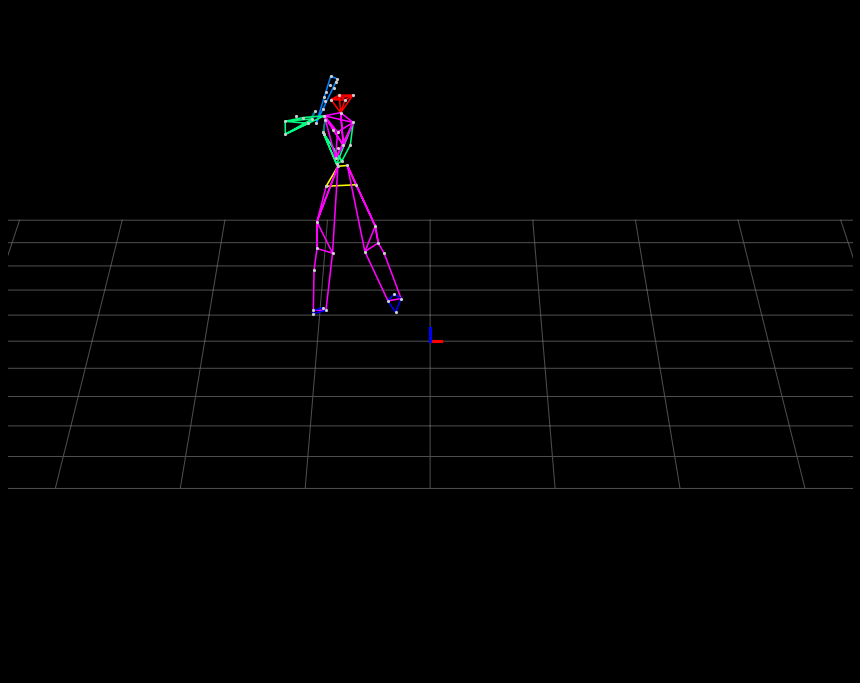

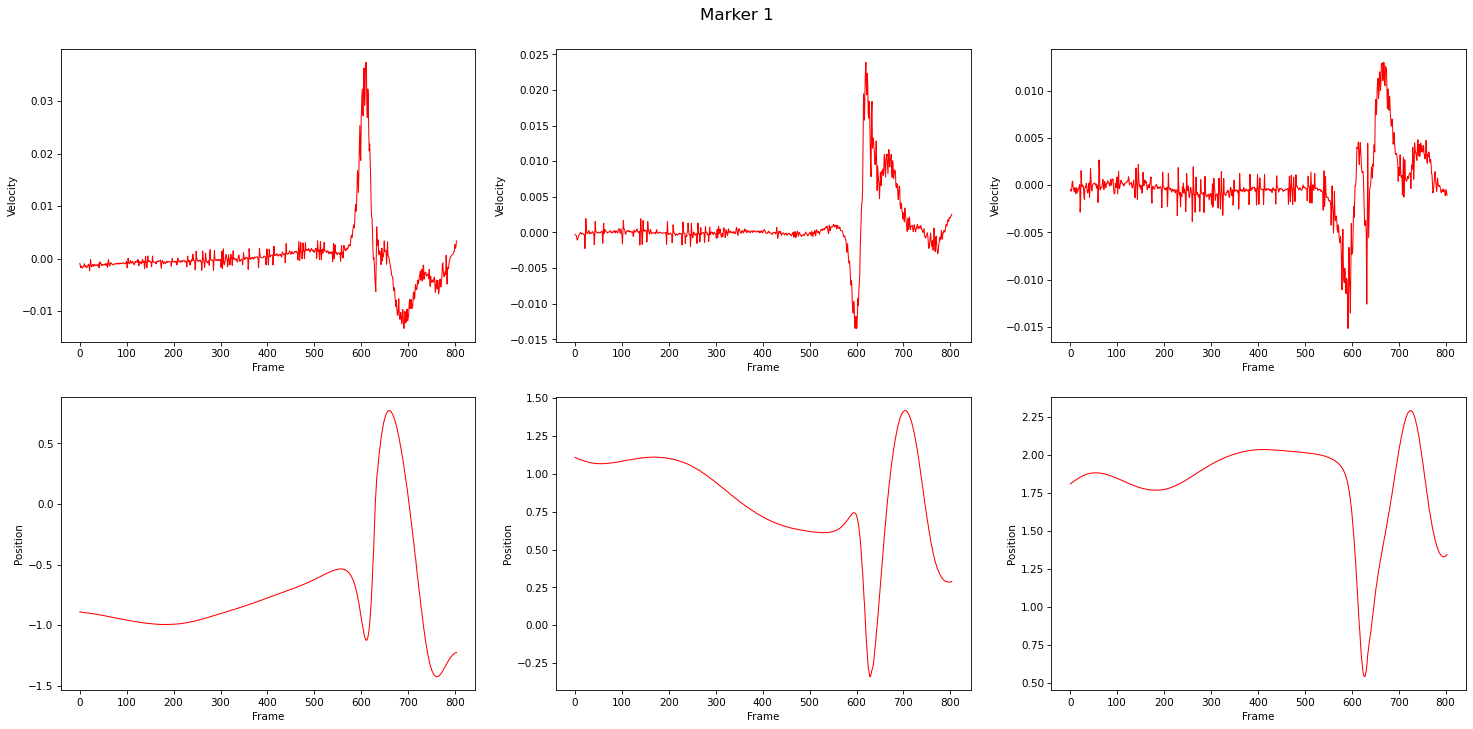

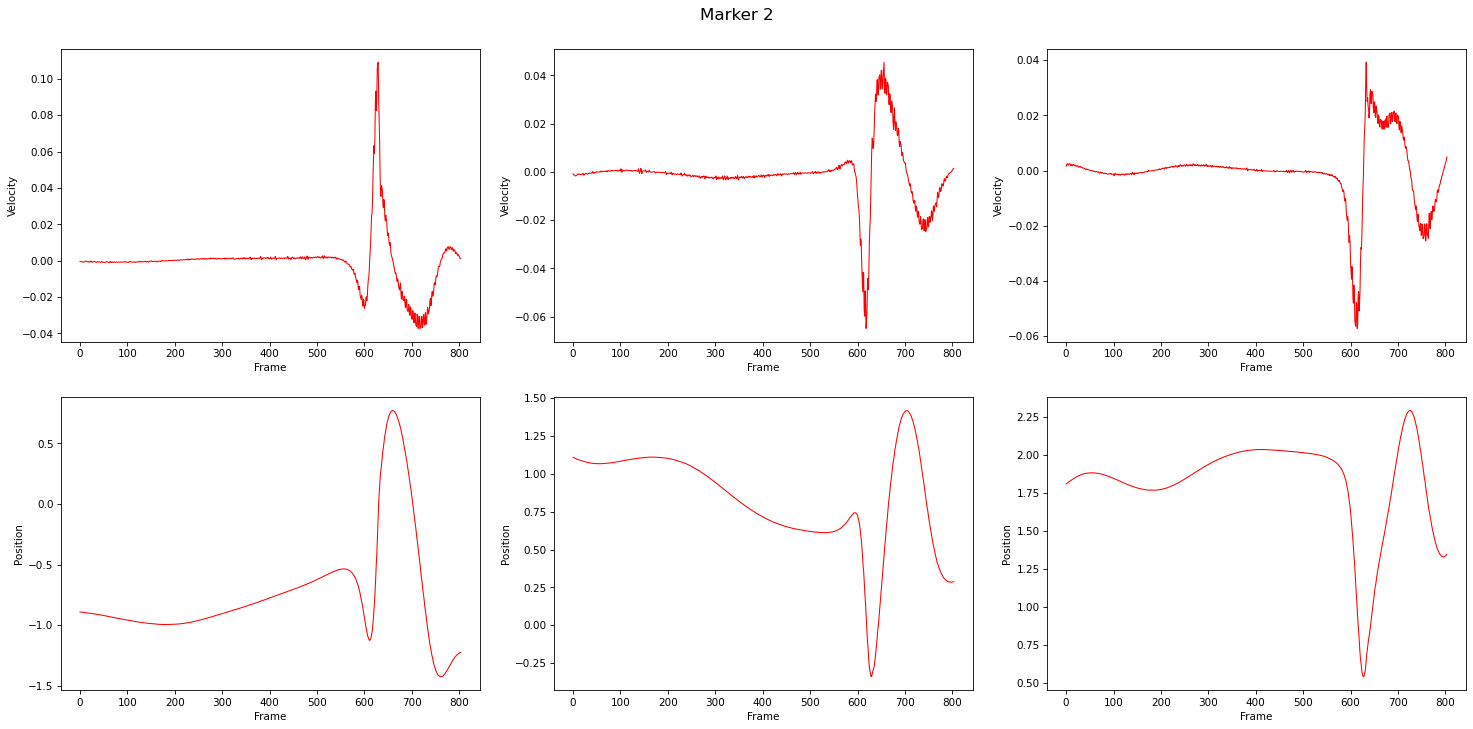

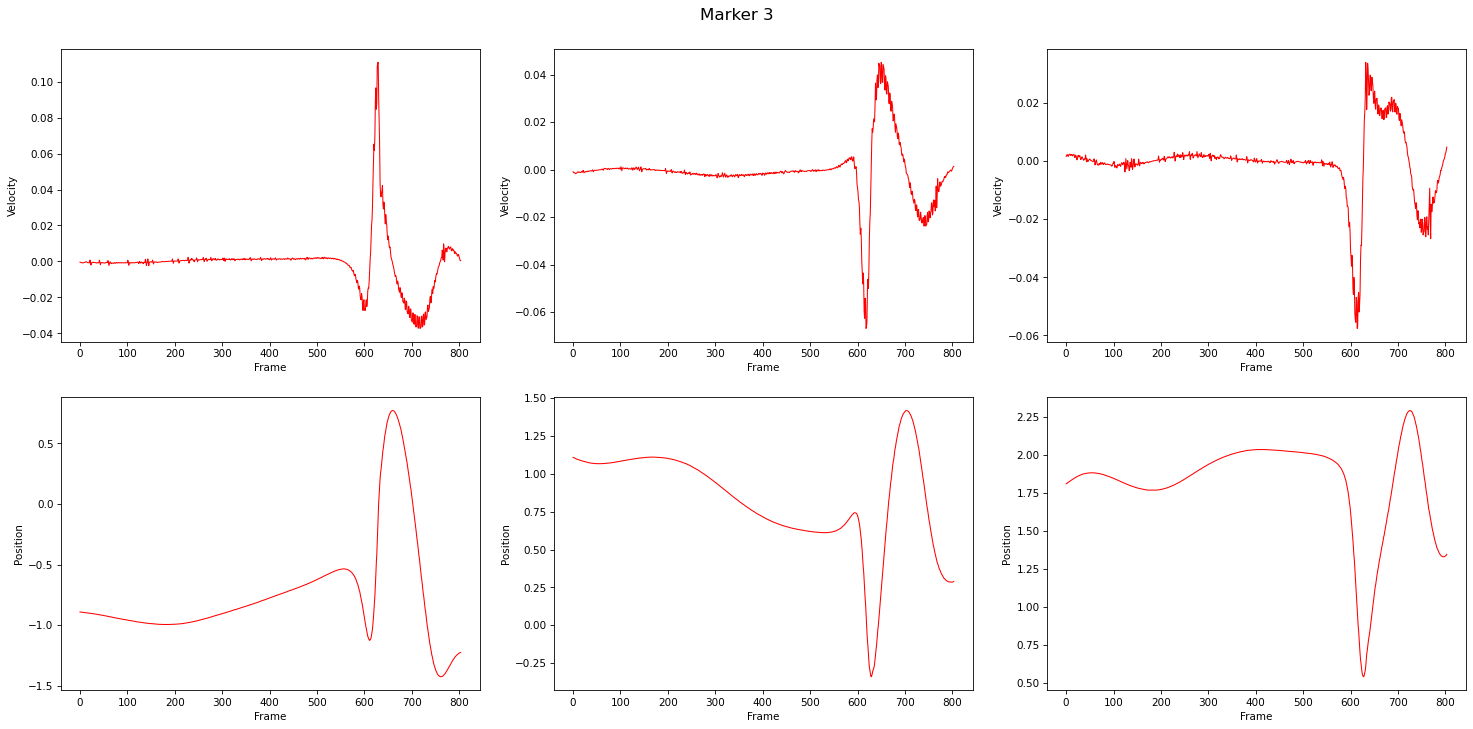

In [37]:
%matplotlib inline 

for mx in gradients_keys:
  plt.figure(figsize=(20, 10))

  for col in range(gradients[mx].columns.size-1):
    plt.subplot(2, gradients[mx].columns.size-1, (col+1))
    plt.xlabel('Frame')
    plt.ylabel('Velocity')
    plt.plot(gradients[mx].iloc[:,col])
    plt.subplot(2, gradients[mx].columns.size-1, (col+1)+4-1)
    plt.xlabel('Frame')
    plt.ylabel('Position')
    plt.plot(m2.iloc[:, col])

  plt.suptitle("Marker " + str(mx)[1], fontsize=16)
  plt.tight_layout(pad=2.0, h_pad=2.0)
  plt.show()


In [38]:
## Establish frames maximum velocity

x=1
frames=[]
for mx in gradients_keys:
  print('Frames Maximum Velocity for \'Marker%d\'' %x)
  ms = []
  for col in gradients[mx].columns:
    print(gradients[mx].loc[:,col].argmax(), end=' ')#, gradients[mx].loc[:,col].max())
    ms.append(gradients[mx].loc[:,col].argmax())
  frames.append(ms)
  x+=1
  print('\n---')
frame = frames[1][0]
p.current_index = frame


Frames Maximum Velocity for 'Marker1'
610 620 668 0 
---
Frames Maximum Velocity for 'Marker2'
629 656 633 0 
---
Frames Maximum Velocity for 'Marker3'
629 650 632 0 
---
